# A short look into `providers` objects


One of the benefits of `contextily` is that it interfaces with the popular XYZ tiling standard. This means that any tiles provided through this format can be accessed. To make your life easier, `contextily` comes with a set of providers included in [`xyzservices`](https://xyzservices.readthedocs.io/en/stable/index.html) that makes including their maps much more straightforward and does not require you know any of the pesky details of the interface. These are all accessible in the `contextily.providers` submodule. The specification `contextily` uses to store these is defined in `xyzservices` so you can mimic it with an alternative provider that may not be built-in. This notebook will take a look at the providers, illustrating how it works, what's available and how you can expand it if needed. 


In [1]:
import contextily as ctx
import xyzservices.providers as xyz

import matplotlib.pyplot as plt

## Choosing a web tile provider

By default, if the user does not specify anything in this respect, the Stamen Terrain background is used:

In [2]:
# we are using an extent around Mexico for the examples
extent = (-12600000, -10300000, 1800000, 3800000)

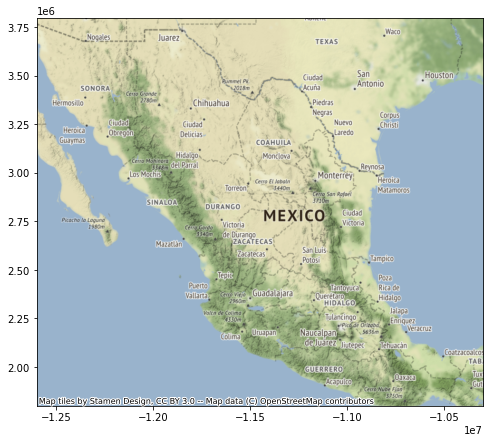

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis(extent)
ctx.add_basemap(ax)

The default can be modified by specifying a different provider with the `source` keyword.

For example, to use Stamen's Toner Lite theme:

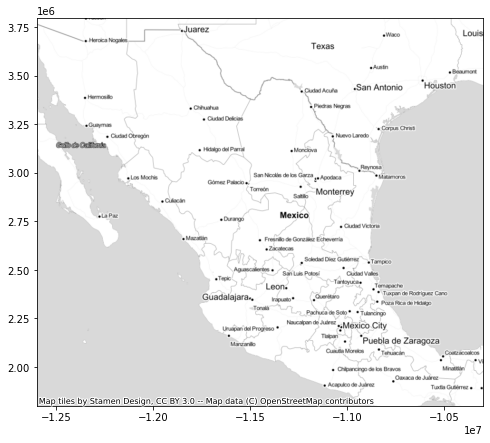

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis(extent)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

Or the main theme by OpenStreetMap:

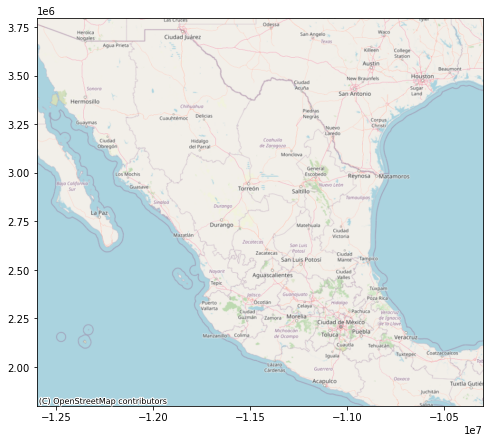

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis(extent)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

Passing `source=ctx.providers.OpenStreetMap.Mapnik` is exactly the same as using `xyzservices` directly - `source=xyz.OpenStreetMap.Mapnik`. Under the hood, `contextily.providers` just wraps `xyzservices.providers`.

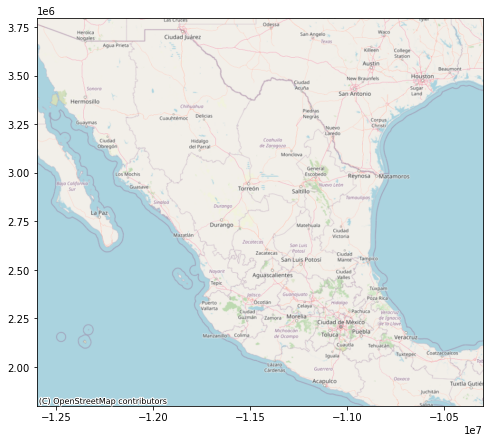

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis(extent)
ctx.add_basemap(ax, source=xyz.OpenStreetMap.Mapnik)

## What is this "provider" object ?

The provider objects being passed to `add_basemap` are stored as `xyzservices.TileProvider` objects (enhanced dictionaries with attribute access for easy access), so we can explore them in Python (or using tab completion in an interactive session!):

In [7]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'OpenSeaMap': {'url': 'https://tiles.openseamap.org/seamark/{z}/{x}/{y}.png',
  'html_attribution': 'Map data: &copy; <a href="http://www.openseamap.org">OpenSeaMap</a> contributors',
  'attribution': 'Map data: (C) OpenSeaMap contributors',
  'name': 'OpenSeaMap'},
 'OpenPtMap': {'url': 'http://openptmap.org/tiles/{z}/{x}/{y}.png',
  'max_zoom': 17,
  'html_attribution': 'Map data: &copy; <a href="http://www.openptmap.org">OpenPtMap</a> contributors',
  'attribution': 'Map data: (C) OpenPtMap contributors',
  'name': 'OpenPtMap',
  'status': 'broken'},
 'OpenTopoMap': {'url': 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
  'max_zoom': 17,
  'html_attribution': 'Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)',
  'attribution': 'Map data: (C) OpenStreetMap contributors, SRTM | Map style: (C) OpenTopoMap (CC-BY-SA)',
  'name': 'OpenTopoMap'},
 'OpenRailwayMap': {'url': 'https://{s}.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': 'Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors | Map style: &copy; <a href

Most of those providers have themselves multiple options. For example, OpenStreetMap provides multiple background styles:

In [8]:
ctx.providers.OpenStreetMap

{'Mapnik': {'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.Mapnik'},
 'DE': {'url': 'https://{s}.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.DE'},
 'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap contributors',
  'bounds': [[45, 5], [48, 11]],
  'name': 'OpenStreetMap.CH'},
 'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
  'max_zoom': 20,
  'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
  'name': 'OpenStreetMap.France'},
 'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
  'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
  'name': 'OpenStreetMap.HOT'},
 'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
  'max_zoom': 19,
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
  'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
  'bounds': [[46.2, -5.5], [50, 0.7]],
  'name': 'OpenStreetMap.BZH'},
 'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'attribution': '(C) OpenStreetMap contributors',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'name': 'OpenStreetMap.BlackAndWhite'}}

Looking at a single one of those options, for example "Mapnik" (the default OpenStreetMap background), we can see this is a `TileProvider` object, which behaves as a dict:

In [9]:
type(ctx.providers.OpenStreetMap.Mapnik)

xyzservices.lib.TileProvider

We can explore its contents:

In [10]:
ctx.providers.OpenStreetMap.Mapnik

{'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
 'max_zoom': 19,
 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
 'attribution': '(C) OpenStreetMap contributors',
 'name': 'OpenStreetMap.Mapnik'}

A "provider object" is then a dictionary with a few required entries, such as the url (required, with `{z}/{x}/{y}` to be replaced), with some additional metadata information (optional). These can be the attribution text to be used on the plot (`attribution`), or the maximum zoom level available for these tiles (`max_zoom`). When this information is available, `contextily` is smart enough to access and use it automatically.

## Specifying options for a provider

Some providers require additional information, such as an API access key. This can be specified by calling the provider object. Any keyword specified will override the default value in the provider object.

For example, the OpenWeatherMap requires an API key:

In [11]:
ctx.providers.OpenWeatherMap.Clouds

{'url': 'http://{s}.tile.openweathermap.org/map/{variant}/{z}/{x}/{y}.png?appid={apiKey}',
 'max_zoom': 19,
 'html_attribution': 'Map data &copy; <a href="http://openweathermap.org">OpenWeatherMap</a>',
 'attribution': 'Map data (C) OpenWeatherMap',
 'apiKey': '<insert your api key here>',
 'opacity': 0.5,
 'variant': 'clouds',
 'name': 'OpenWeatherMap.Clouds'}

We can specify this API key by calling the object:

In [12]:
ctx.providers.OpenWeatherMap.Clouds(apiKey="my-private-api-key")

{'url': 'http://{s}.tile.openweathermap.org/map/{variant}/{z}/{x}/{y}.png?appid={apiKey}',
 'max_zoom': 19,
 'html_attribution': 'Map data &copy; <a href="http://openweathermap.org">OpenWeatherMap</a>',
 'attribution': 'Map data (C) OpenWeatherMap',
 'apiKey': 'my-private-api-key',
 'opacity': 0.5,
 'variant': 'clouds',
 'name': 'OpenWeatherMap.Clouds'}

This can then be specified where a `source` is expected. For example:
    
```python
ctx.add_basemap(ax, source=ctx.providers.OpenWeatherMap.Clouds(apiKey="my-private-api-key"))
```


## Manually specifying a provider

Since the provider definition is basically nothing more than an url with the `{z}/{x}/{y}` format, you can also specify such an url manually, in case the provider of your choice is not available in `contextily` (the provider is expected to follow the standard XYZ tile protocol):

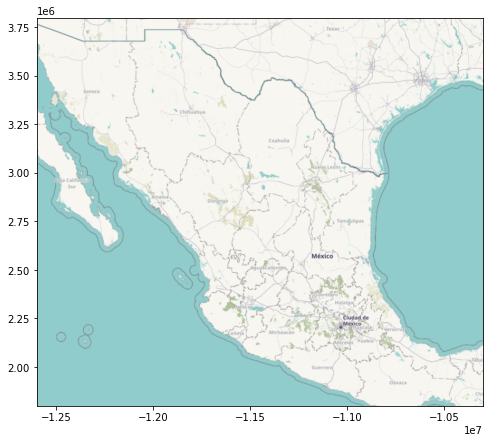

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis(extent)
# using the url from `ctx.providers.OpenStreetMap.HOT` as example
ctx.add_basemap(ax, source='https://a.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png')

In addition, you could also construct a dictionary with the `"url"` key and additional information yourself, for example to provide a default attribution text for all your plots.

## Overview of built-in providers

Let us create a flat dictionary of the built-in providers:

In [14]:
providers = ctx.providers.flatten()

This results in quite a few of them already available:

In [15]:
len(providers)

219

For this illustration, let's single out the following ones:

In [16]:
selection = ['OpenStreetMap.Mapnik', 
             'OpenTopoMap', 
             'Stamen.Toner', 
             'Stamen.TonerLite', 
             'Stamen.Terrain', 
             'Stamen.TerrainBackground', 
             'Stamen.Watercolor', 
             'NASAGIBS.ViirsEarthAtNight2012', 
             'CartoDB.Positron', 
             'CartoDB.Voyager'
            ]

In [17]:
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
axs = axs.flatten()
for name, ax in zip(selection, axs):
    ax.axis(extent)
    ctx.add_basemap(ax, source=providers[name])
    ax.set_title(name)
    ax.set_axis_off()
plt.show()
fig.savefig("tiles.png", bbox_inches="tight")

For more details on providers, see the documentation of [`xyzservices`](https://xyzservices.readthedocs.io/en/stable/index.html).